In [31]:
import torch
import matplotlib.pyplot as plt
from diffusion_utils import *

# Noise Schedule

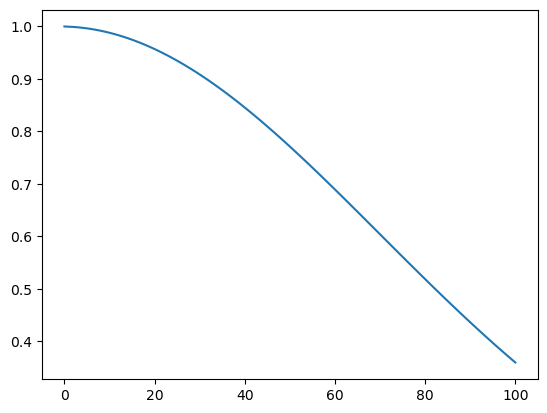

In [39]:
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))

time_steps = 100
beta1 = 1e-4
beta2 = 2e-2
ab_t = linear_time_schedule(time_steps, beta1=beta1, beta2=beta2, device=device)
#ab_t.shape
plt.plot(ab_t.to('cpu'))
plt.show()

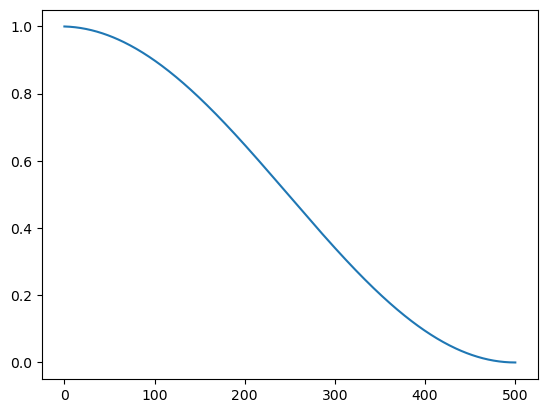

In [19]:
import math
time_steps = 500
s = 0.008

ab_t = cosine_time_schedule(time_steps,s,device)
#ab_t.shape
plt.plot(ab_t.to('cpu'))
plt.show()

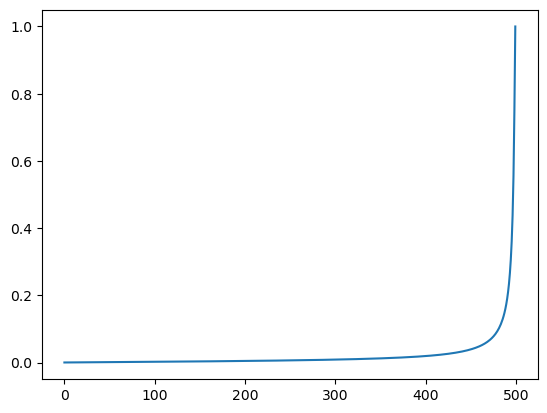

In [13]:
variances = 1 - ab_t[1:]/ab_t[:-1]
plt.plot(variances.cpu())
plt.show()

# Embeddings

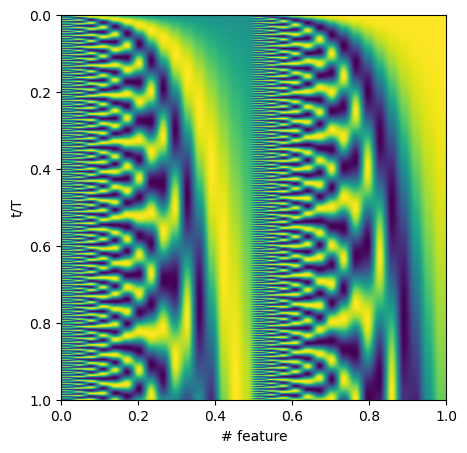

In [30]:
import math
time_steps = 1000
emb_dim = 32
d = 1000
time = torch.arange(0,time_steps)
device = time.device
half_dim = emb_dim // 2
embeddings = math.log(d) / (half_dim - 1)
embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
embeddings = time[:, None] * embeddings[None, :]
embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)

plt.figure(figsize=[5,5])
plt.imshow(embeddings[:,:].to('cpu'), extent=[0,1,1,0])
plt.xlabel('# feature')
plt.ylabel("t/T")
#plt.xlim(0,10)
plt.show()


## Fourier Embeddings

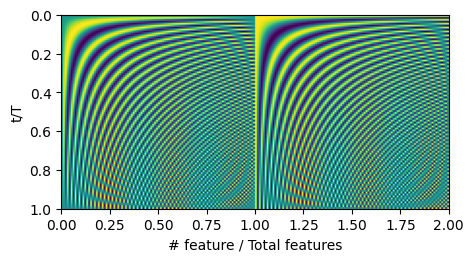

In [50]:

import math
emb_dim = 200
time_steps = 100
time = torch.arange(0,time_steps)
device = time.device
half_dim = emb_dim // 2
freqs = torch.arange(0,half_dim) / half_dim * math.pi
# embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
embeddings = time[:, None]/time_steps*half_dim * freqs[None, :]
embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)


plt.figure(figsize=[5,5])
plt.imshow(embeddings[:,:].to('cpu'), extent=[0,2,1,0])
plt.xlabel('# feature / Total features')
plt.ylabel("t/T")
#plt.xlim(0,10)
plt.show()
